In [1]:
!pip install nltk textblob wordcloud
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud
import nltk
nltk.download('punkt')
nltk.download('stopwords')

sns.set(style="whitegrid")
plt.rcParams['figure.dpi'] = 120


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
url = "https://raw.githubusercontent.com/Prodigy-InfoTech/data-science-datasets/refs/heads/main/Task%204/twitter_training.csv"
df = pd.read_csv(url)
df.head()


,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [7]:
df.info()
df.describe(include='all').T
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


,0
2401,0
Borderlands,0
Positive,0
"im getting on borderlands and i will murder you all ,",686


In [9]:
import re
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\\S+|www\\S+", "", text)
    text = re.sub(r"@[A-Za-z0-9_]+","", text)
    text = re.sub(r"#[A-Za-z0-9_]+","", text)
    text = re.sub(r"[^a-zA-Z ]", "", text)
    words = text.split()
    words = [w for w in words if w not in stop_words]
    return " ".join(words)

# Rename columns for clarity and to fix the KeyError
df.columns = ['tweet_id', 'entity', 'sentiment', 'tweet_text']

df["clean_text"] = df["tweet_text"].apply(clean_text)
df.head()

,tweet_id,entity,sentiment,tweet_text,clean_text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,coming borders kill
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting borderlands kill
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming borderlands murder
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting borderlands murder
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,im getting borderlands murder


In [10]:
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

df["sentiment"] = df["clean_text"].apply(get_sentiment)
df.head()


,tweet_id,entity,sentiment,tweet_text,clean_text
0,2401,Borderlands,Neutral,I am coming to the borders and I will kill you...,coming borders kill
1,2401,Borderlands,Neutral,im getting on borderlands and i will kill you ...,im getting borderlands kill
2,2401,Borderlands,Neutral,im coming on borderlands and i will murder you...,im coming borderlands murder
3,2401,Borderlands,Neutral,im getting on borderlands 2 and i will murder ...,im getting borderlands murder
4,2401,Borderlands,Neutral,im getting into borderlands and i can murder y...,im getting borderlands murder


/tmp/ipython-input-3273920726.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='viridis')


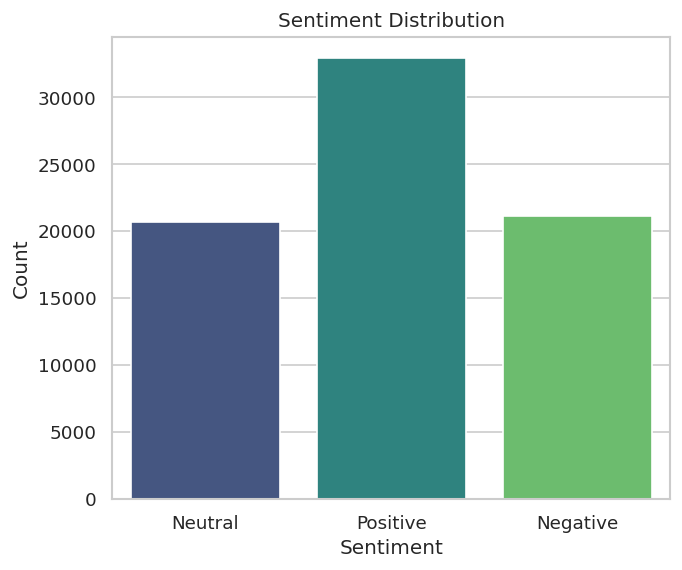

In [11]:
plt.figure(figsize=(6,5))
sns.countplot(data=df, x='sentiment', palette='viridis')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


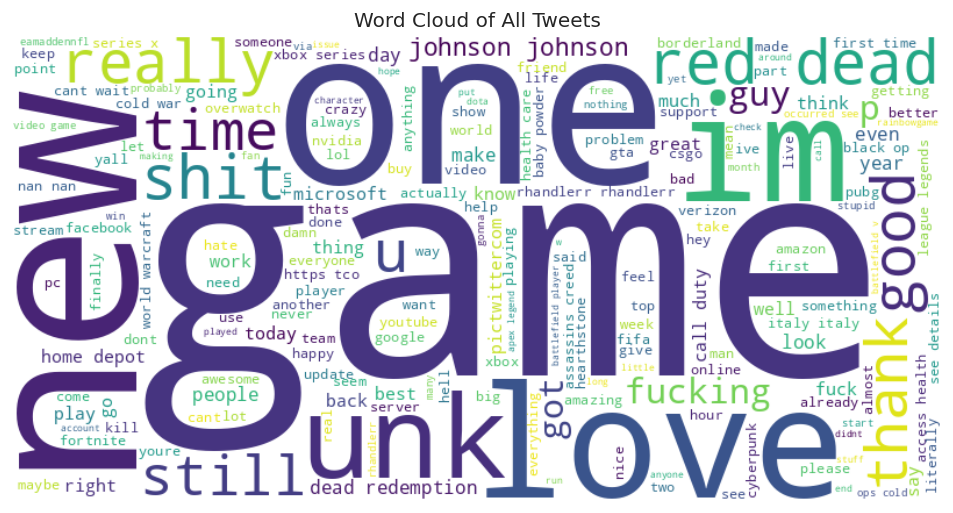

In [12]:
all_words = " ".join(df["clean_text"])
wc = WordCloud(width=800, height=400, background_color='white').generate(all_words)

plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of All Tweets")
plt.show()


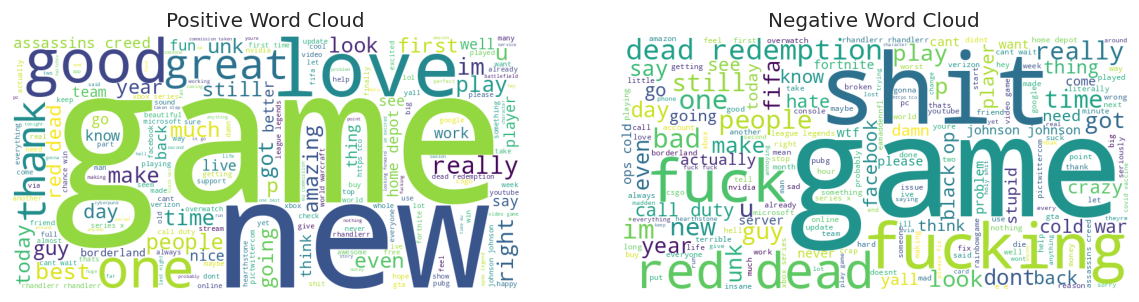

In [13]:
pos_words = " ".join(df[df['sentiment']=='Positive']["clean_text"])
neg_words = " ".join(df[df['sentiment']=='Negative']["clean_text"])

wc_pos = WordCloud(width=800, height=400, background_color='white').generate(pos_words)
wc_neg = WordCloud(width=800, height=400, background_color='white').generate(neg_words)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(wc_pos); plt.axis("off"); plt.title("Positive Word Cloud")

plt.subplot(1,2,2)
plt.imshow(wc_neg); plt.axis("off"); plt.title("Negative Word Cloud")

plt.show()


/tmp/ipython-input-3947040566.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=words_df, x="count", y="word", palette="magma")


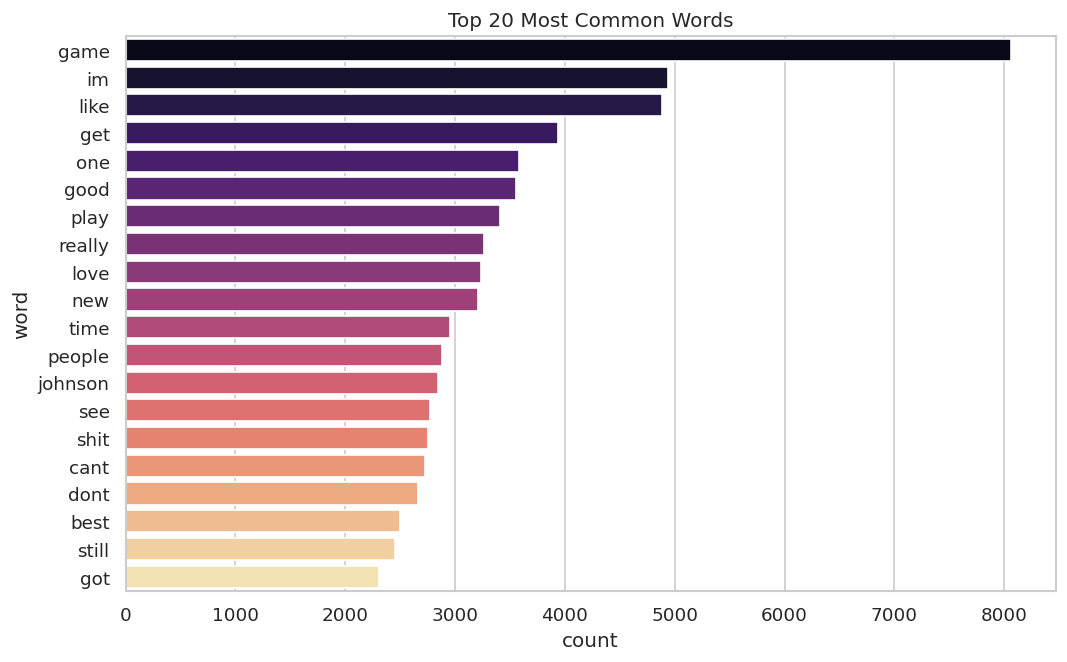

In [14]:
from collections import Counter

words = all_words.split()
common = Counter(words).most_common(20)

words_df = pd.DataFrame(common, columns=["word","count"])

plt.figure(figsize=(10,6))
sns.barplot(data=words_df, x="count", y="word", palette="magma")
plt.title("Top 20 Most Common Words")
plt.show()
